# Carga de Dataset
Cargamos el archivo CSV y analizamos los tipos de datos, columnas, y valores

In [1]:
import pandas as pd
import numpy as np

# Cargo el dataset en un dataframe
df_billboard = pd.read_csv('billboard.csv', encoding = "ISO-8859-1",parse_dates=['date.entered','date.peaked'])
df_billboard

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,59,52.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,83,83.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,63,45.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,77,66.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,81,54.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Limpieza de Datos
## Eliminar Columnas sin valores
Al inspeccionar la información del dataset, podemos ver que hay columnas que no tienen NINGUN valor en todas sus filas. <br>
Estas columnas, se eliminan del dataset por completo ya que no aportan ningún tipo de información relevante

In [2]:
# Elimino las series que no tienen valores.
df_billboard.dropna(axis=1,how='all', inplace=True)


## Corrección de Nombres de Artistas y canciones
Analizando el Dataset encontramos nombres de artistas incorrectamente ingresados, así como nombres de algunas canciones, por lo que realizamos la corrección manualmente.

También invertimos el nombre de los artistas, pasando de nombre invertido (apellido, nombre) a Nombre y Apellido.

In [3]:
def invert_comma_name(value):
    "Invierte un nombre dividido con comas (apellido y nombre) al orden Nombre y Apellido"
    
    # Separo el valor con coma
    arr_value = value.split(',')
    
    # Si el array tiene mas de 1 elemento
    if len(arr_value) > 1:
        # los concateno invirtiendolos
        return arr_value[1].strip() + ' ' + arr_value[0].strip()
    else:
        # Sinó devuelvo el mismo elemento
        return arr_value[0].strip()
    
# Invierto el nombre del artista en una nueva columna, utilizando primero el nomrbe y despues apellido
df_billboard['artist'] = df_billboard['artist.inverted'].apply(invert_comma_name)

# 98! debería ser 98º
df_billboard.loc[df_billboard['artist.inverted'] == '98¡','artist.inverted'] = '98º'

# Janet (track Doesn't Really Matter) debería ser Janet Jackson
df_billboard.loc[(df_billboard['artist.inverted'] == 'Janet') & (df_billboard['track'] == "Doesn't Really Matter"),'artist.inverted'] = 'Janet Jackson'

# wwwmemory debería ser WWW Memory
df_billboard.loc[(df_billboard['track'] == 'wwwmemory'),'track'] = 'WWW Memory'

# Fellin' Good de Jennifer Lopez debería ser Feelin' So Good
df_billboard.loc[(df_billboard['artist'] == 'Jennifer Lopez') & (df_billboard['track'] == "Feelin' Good"),'track'] = "Feelin' So Good"

# Ride or Dye, Chick de Lox debería ser Ryde Or Die, Bitch
df_billboard.loc[(df_billboard['artist'] == 'Lox') & (df_billboard['track'] == "Ryde or Die, Chick"),'track'] = "Ryde or Die, Bitch"

# There U Go de Pink debería ser There you go
df_billboard.loc[(df_billboard['artist'] == 'Pink') & (df_billboard['track'] == "There U Go"),'track'] = "There You Go"

# Auld Lang Syne (The Millenium Mix) de Kenny G debería ser Auld Lang Syne (The Millenbium Mix)
df_billboard.loc[(df_billboard['artist'] == 'Kenny G') & (df_billboard['track'] == "Auld Lang Syne (The Millenium Mix)"),'track'] = "Auld Lang Syne (The Millennium Mix)"

# (Hot S**t) Country Grammar de Nelly debería ser (Hot Shit) Country Grammar
df_billboard.loc[(df_billboard['artist'] == 'Nelly') & (df_billboard['track'] == "(Hot S**t) Country Grammar"),'track'] = "(Hot Shit) Country Grammar"

# Por último, elimino la columna artist.inverted ya que vamos a usar la nueva columna ARTIST.
df_billboard.drop(labels='artist.inverted',axis=1, inplace=True)

### Actualización  de Géneros
Actualizamos los géneros de cada canción del dataset para poder empezar a trabajar.

**Observamos las obras y notamos algo particular:**
*El género de las canciones, no coincide con los géneros a los que uno pensaría que pertenece.*<br>

Por ejemplo estos artístas uno asumiría que estan en la sección pop, pero sin embargo están marcados como ROCK:
- Christina Aquilera
- Backstreet Boys
- Destiny's Child
- Whitney Houston
- Toni Braxton

Para solucionar este problema utilizamos la api de Last.FM para obtener información de cada canción.

Esto lo hacemos sobre TODO el dataset para asegurarnos datos congruentes. Las canciones de las que no logramos obtener información, la identificamos con el genero NO TAG

In [4]:
import requests
import urllib.parse
import time
import pylast
    
# Datos de LAST FM
LAST_FM_API_KEY = 'INGRESA TU API KEY DE LAST FM'
LAST_FM_API_SECRET = 'INGRESA TU API SECRET DE LAST FM'

# instancio la librería con mi API KEY
network = pylast.LastFMNetwork(api_key=LAST_FM_API_KEY)

In [5]:
import sys 
import os.path

# El dataframe con los datos corregidos se guarda en un archivo nuevo para no tener que reprocesarlos ya que lleva tiempo.
csv_billboard_corrected = 'billboard_genre_corrected.csv'

# Solo proceso los generos si el archivo no existe
if not os.path.isfile(csv_billboard_corrected):
    # Por cada ITEM del dataset
    for index, row in df_billboard.iterrows():
    
        # Last.fm busca sin caracteres especiales
        # Elimino los puntos
        track_name = row['track'].replace('.','')
        track_name = track_name.replace('!','')
        
        # Obtengo el track buscando por artista y track
        track = network.get_track(row['artist'], track_name)
    
        # Flag que indica si el llamado al Web Service tuvo un error
        ws_error = False
        
        try:
            # Obtengo los top tags
            top_tags = track.get_top_tags(limit=10)
            ws_error = False
        except:
            ws_error = True
        
        possible_genres = ['rock','pop','rnb','r&b','pop','dance','hip-hop','hip hop','country','jazz','rap','reggae','gospel', 'soul','metal']
        
        # Me aseguro de que tenga algún tag y que no sea error
        if (ws_error == False) and (len(top_tags) > 0):
            
            # Combino la lista de posibles generos con los tags obtenidos
            possible_tags = [possible for possible in possible_genres if possible.lower().strip() in [str(this_tag[0]).lower().strip() for this_tag in top_tags]]
            
            # si el género está entre los género que busco, lo asigno
            if len(possible_tags) > 0:
                # Asigno el primer valor
                new_genero = possible_tags[0]
                print('Asignando genero',new_genero,'a',track)
            else:
                print('GENERO NO ENCONTRADO PARA',track,'EN',top_tags)
                # Le agrego antes el texto NOT POSSIBLE GENRE para poder tratarlo
                new_genero = 'NO TAG'
        else:
            print('No se encontró información para',track)
        
            # Sinó asigno el mensaje NO TAG
            new_genero = 'NO TAG'
    
        # Reemplazo valores que son lo mismo normalizandolos a uno solo
        if (new_genero == 'hip hop'):  new_genero = 'hip-hop'
        if (new_genero == 'r&b'):  new_genero = 'rnb'
        
        # Asigno el nuevo género a una columna llamada genre.corrected
        df_billboard.set_value(index, 'genre.corrected', new_genero)
        
    df_billboard.to_csv(csv_billboard_corrected,encoding = "ISO-8859-1")
else:
    # Si el archivo ya existe, lo cargo desde nuestro disco en vez de generarlo
    df_billboard = pd.read_csv('billboard_genre_corrected.csv',encoding = "ISO-8859-1",parse_dates=['date.entered','date.peaked'])

## Pivoteo de Columnas de Semanas en Billboard
Luego, obtenemos todas las columnas que corresponden a la posición en la que estuvo cada obra, en cada semana y las convertimos en filas en vez de columnas.
Esto nos convierte  las columns de WEEK en filas pasando:
- El nombre de la semana (nombre de cada columna), a una columna llamada WEEK
- El valor que tenía cada columna de semana a una columna llamada RANKING alineada con la WEEK correspondiente.

In [6]:
# Obtengo los nombres de columnas que me indican la posición por semana
week_columns = [column for column in df_billboard.columns if column.startswith('x') & column.endswith('.week')]

# Obtengo el resto de las columnas
id_columns = ['artist','track','time','genre.corrected','date.entered','date.peaked']

# Pivoteo las columnas usando:
# Las columnas que no son posicion por semana, como ID
# Las columnas se semana, se convierten en dos columnas: Una informa la semana, y la otra indica la posicion
df_billboard_melted = df_billboard.melt(id_vars=id_columns, value_vars=week_columns, var_name='week', value_name='ranking')

# Inspecciono el nuevo dataframe
df_billboard_melted.head()

,artist,track,time,genre.corrected,date.entered,date.peaked,week,ranking
0,Destiny's Child,Independent Women Part I,3:38,pop,2000-09-23,2000-11-18,x1st.week,78.0
1,Santana,"Maria, Maria",4:18,rock,2000-02-12,2000-04-08,x1st.week,15.0
2,Savage Garden,I Knew I Loved You,4:07,rock,1999-10-23,2000-01-29,x1st.week,71.0
3,Madonna,Music,3:45,pop,2000-08-12,2000-09-16,x1st.week,41.0
4,Christina Aguilera,Come On Over Baby (All I Want Is You),3:38,pop,2000-08-05,2000-10-14,x1st.week,57.0


Actualizamos el valor de la columna WEEK para que solo tenga el NRO de semana:
- Removiendo los caracteres y dejando solo el nro.
- Convirtiendo a INT el tipo de dato


In [7]:
# Actualizo el nombre de la columna Weeks, por el número de semana y la convierto a INT
df_billboard_melted['week'] = df_billboard_melted['week'].apply(lambda week: int(week[1:-5].replace('st','').replace('th','').replace('nd','').replace('rd','')))
df_billboard_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20605 entries, 0 to 20604
Data columns (total 8 columns):
artist             20605 non-null object
track              20605 non-null object
time               20605 non-null object
genre.corrected    20605 non-null object
date.entered       20605 non-null datetime64[ns]
date.peaked        20605 non-null datetime64[ns]
week               20605 non-null int64
ranking            5307 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 1.3+ MB


Eliminamos las filas que en la columna position, no tengan ningun valor. (Es decir, que no hayan alcanzado a estar en el ranking en alguna semana especifica.<br>
De esta manera podemos eliminar las filas que no nos sirven en nuetsro análisis, ya que si una obra no alcanzó a estar en una posicion en una semana específica, no vamos a usar ese valor.

In [8]:
# Usando DROPNA sobre el dataframe, y pasandole el parametro subset con el nombre de la columna, le indicamos
# que queremos eliminar las filas que tengan valores NA en la columna RANKING
df_billboard_melted = df_billboard_melted.dropna(subset=['ranking'])

## Fechas y Tiempo a Períodos

Las fechas específicas de lanzamiento o pico no son muy útiles. Lo que mas nos sirve para nuestro análisis, es el período Año Mes, por lo que convertimos las fechas a períodos con el método dt.to_period()

In [9]:
df_billboard['period.entered'] = df_billboard.loc[:,'date.entered'].dt.to_period('m')
df_billboard['period.peaked'] = df_billboard.loc[:,'date.peaked'].dt.to_period('m')
df_billboard_melted['time'] = pd.to_datetime(df_billboard_melted['time'], format='%M:%S')
df_billboard_melted['float_minutes'] = df_billboard_melted['time'].dt.minute.astype(float) + (df_billboard_melted['time'].dt.second.astype(float) / 60.)

## Tiempo entre Fecha de ingreso al billboard y fecha en que alcanza su máxima posición
Creamos una nueva columna llamada *days.peaked* que nos indica la cantidad de días que pasaron desde el lanzamiento hasta el mayor pico de ranking.

In [10]:
df_billboard_melted['days.peaked'] = (df_billboard_melted['date.peaked'] - df_billboard_melted['date.entered']).astype('timedelta64[D]')

## Ranking Ponerado
Obtengo el ranking ponderado de cada Track basado en la posición de cada semana

In [11]:
# Calcúlo el ranking invertido
ranking_invertido = 100 - df_billboard_melted['ranking'] + 1

# Calculo el peso
peso = (ranking_invertido / 5050)

# Calculo el ranking ponderado
ponderado = peso * ranking_invertido

# Agrego el ponderado a la tabla Melted
df_billboard_melted['ranking_ponderado'] = ponderado

## Tiempo entre fecha de pico y salida del billboard
Agregamos una última columna que nos indica la cantidad de días que duró una obra desde el momento en que alcanza su posición máxima hasta que es eliminado del billboard.

Para esto obtenemos el nro de semana del ranking máximo, y nro de semana máximo.
Restamos los dos valores. Esto nos da la diferencia en semanas, asique lo multiplicamos por 7 dias y tenemos la diferecia de dias entre pico y remoción del billboard.

In [12]:
# Obtengo el ranking minimo por cancion y la última semana en la que estuvo en el billboard
df_billboard_group = df_billboard_melted.groupby(['artist','track','days.peaked','genre.corrected','float_minutes']).agg({'ranking':'min','week':'max','ranking_ponderado':'sum'}).reset_index()

# Por cada track y su indice Mínimo
for index, row in df_billboard_group.iterrows():
    
    # Obtengo la primer semana en la que estuvo en el ranking mas alto.
    top_ranking_week =  df_billboard_melted.loc[(df_billboard_melted['track'] == row['track']) & (df_billboard_melted['ranking'] == row['ranking']), 'week'].min()
    
    # Le asigno el valor a la columna top_ranking_week
    df_billboard_group.set_value(index=index, col='top_ranking_week',value=top_ranking_week)
    
    # Obtengo la posición en la que ingresó al ranking
    enter_ranking = df_billboard_melted.loc[(df_billboard_melted['track'] == row['track']) & (df_billboard_melted['week'] == 1), 'ranking'].min()
    
    # Le asigno el valor a la columna enter_ranking
    df_billboard_group.set_value(index=index, col='enter_ranking', value=enter_ranking)

    
# Calculo la cantidad de semanas entre el pico y la salida del chart 
# (ULTIMA SEMANA - SEMANA PICO)
df_billboard_group['weeks_peak_to_removal'] = (df_billboard_group['week'] - df_billboard_group['top_ranking_week'])

df_billboard_group.sort_values('enter_ranking')



,artist,track,days.peaked,genre.corrected,float_minutes,ranking,week,ranking_ponderado,top_ranking_week,enter_ranking,weeks_peak_to_removal
241,Santana,"Maria, Maria",56.0,rock,4.300000,1.0,26,43.175644,9.0,15.0,17.0
118,Hanson,This Time Around,14.0,rock,4.233333,20.0,7,4.616040,3.0,22.0,4.0
224,Pink,There You Go,35.0,rock,3.383333,7.0,32,43.807525,6.0,25.0,26.0
190,Mariah Carey,Crybaby,0.0,pop,5.316667,28.0,7,2.946733,1.0,28.0,6.0
201,"Missy ""Misdemeanor"" Elliott",Hot Boyz,42.0,rnb,3.850000,5.0,21,31.616238,7.0,36.0,14.0
236,Ricky Martin,She Bangs,56.0,pop,4.033333,12.0,18,17.061782,9.0,38.0,9.0
266,The Backstreet Boys,Shape Of My Heart,49.0,pop,3.816667,9.0,20,22.471089,8.0,39.0,12.0
271,The Dixie Chicks,Goodbye Earl,49.0,country,4.316667,19.0,15,10.533069,8.0,40.0,7.0
186,Madonna,Music,35.0,pop,3.750000,1.0,24,37.238218,6.0,41.0,18.0
208,N'Sync,Bye Bye Bye,77.0,pop,3.250000,4.0,23,34.857228,12.0,42.0,11.0


# Análisis Exploratorio

In [13]:
# Importo librerías de ploting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Distribución de Géneros
Graficamos la distribución de los géneros

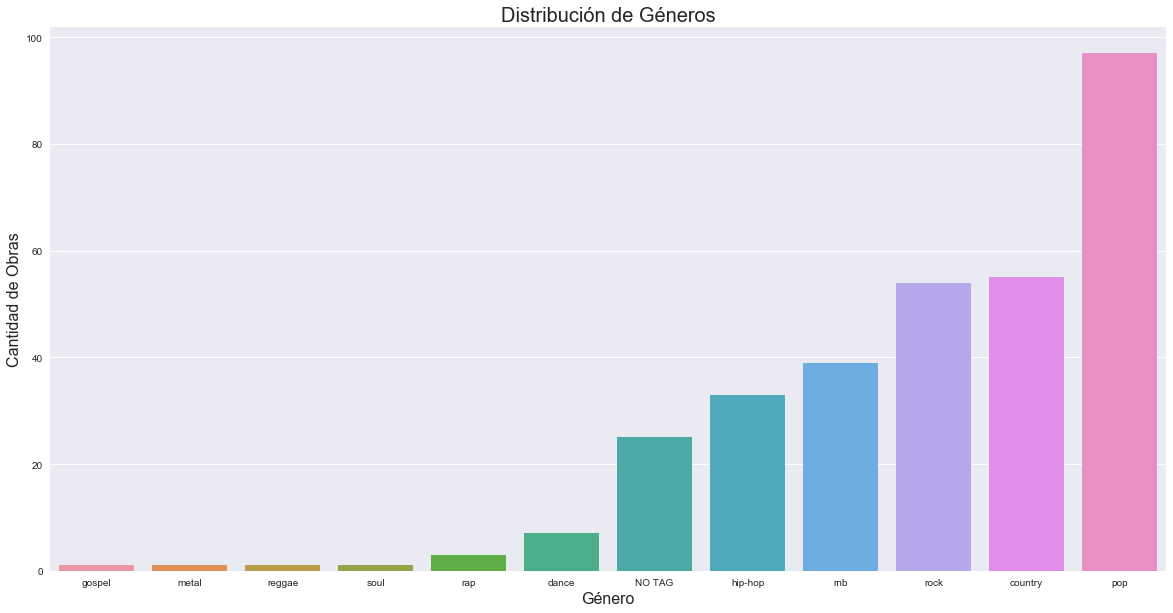

In [14]:
sns.set()
plt.figure(figsize=(20,10))

# Obtenemos los géneros agrupados por género, y contamos la cantidad de tracks.
df_billboard_genre = df_billboard.groupby(by='genre.corrected').agg({'track':'count'}).sort_values('track')

# Reestablecemos el index para usarlo cmo columna
df_billboard_genre.reset_index(inplace=True)

# Mostramos un barplot con la cantidad de tracks por genero
sns.barplot(data=df_billboard_genre, x='genre.corrected', y='track')

# Configuramos los labels del plot
plt.title('Distribución de Géneros', fontsize=20)
plt.ylabel('Cantidad de Obras', fontsize=16)
plt.xlabel('Género', fontsize=16)

## Posicion de obras por semana
Graficamos la posición de cada canción contra la semana. <br>
Observando el siguiente gráfico, podemos sacar las siguientes conclusiones:
1. Las canciones que no llegan al top 50, y estan en descenso llegada la semana 20, son removidas del billboard
2. Las canciones que superan el top 50, y estan en descenso, son removidas al descender a la posición 50, sin importar en qué semana se encuentran.

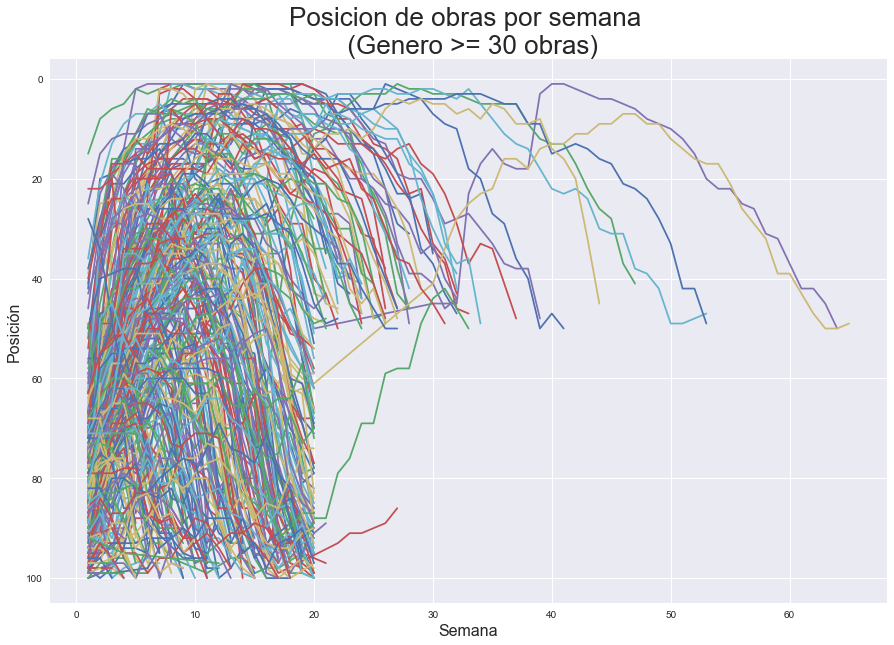

In [15]:
# Configuración de visualización generarl
sns.set()
plt.figure(figsize=(15,10))

# Obtengo solo los generos que tienen mas de 30 obras
top_genres = df_billboard_genre.loc[df_billboard_genre['track'] >= 30]

# Por cada track del billboard
for track in df_billboard['track']:
    

    # Obtengo solo los datos de solo ese track (semanas, ranking, etc)
    # Y que además está en los generos que mas obras tienen
    plot_df = df_billboard_melted.loc[(df_billboard_melted['track'] == track) & (df_billboard_melted['genre.corrected'].isin(top_genres['genre.corrected']))]
    
    # Ploteamos las semanas contra la posición en cada semana
    plt.plot(plot_df['week'], plot_df['ranking'], )

# El numero mas alto de position indica menor altura en el ranking.
# Invertimos el eje Y para representarlo mejor.
plt.gca().invert_yaxis()

# Incluímos los labels de cada eje y el título
plt.title('Posicion de obras por semana \n (Genero >= 30 obras)', fontsize=26)
plt.xlabel('Semana',fontsize=16)
plt.ylabel('Posición',fontsize=16)

## Distribución de permanencia (para géneros > 30 tracks)
Obtenemos la información de distribución de permanencia (en cantidad de semanas), basados en el número máximo de semana para cada obra.

In [16]:
# Obtengo los géneros con más de 30 canciones
computable_genres = df_billboard_genre.loc[df_billboard_genre['track'] > 30]

# Obtengo los tracks que están dentro de los generos seleccionados
tracks_top_genres = df_billboard_group.loc[df_billboard_group['genre.corrected'].isin(computable_genres['genre.corrected'])]

# Vemos la información de las semanas
tracks_top_genres[['week']].describe()

,week
count,278.000000
mean,17.834532
std,9.268243
min,1.000000
25%,11.000000
50%,20.000000
75%,20.000000
max,65.000000


Graficamos la sitribución para cada grupo

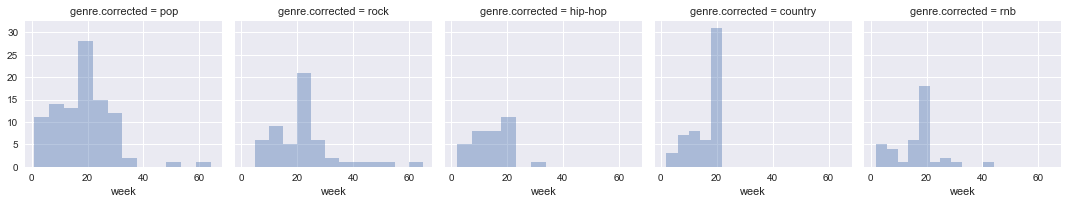

In [17]:
# Muestro la distribución de cada género
g = sns.FacetGrid(tracks_top_genres, col="genre.corrected")
g = g.map(sns.distplot, "week", kde=False)

## Cálculo de Ranking Ponderado

In [18]:

# Obtengo el 25% del ponderado
ponderado_75 = df_billboard_group.describe()['75%':'75%']['ranking_ponderado'][0]

# Obtengo solo los tracks que están por encima del 75% y que están entre los ranking top
df_hits_ponderado = df_billboard_group.loc[df_billboard_group['ranking_ponderado'] >= ponderado_75].sort_values(by='ranking_ponderado', ascending=False)

# Lo guardo a un CSV para mostrarlo en la presentación
df_hits_ponderado[['artist','track','genre.corrected','ranking','week','ranking_ponderado']].to_csv('tops_ponderado.csv')

## Cálculo de Probabilidad de Hits

In [36]:
# Obtengo la cantidad de cada genero
hits_by_genre = tracks_top_genres.groupby('genre.corrected').agg({'track':'count'})

# En el DataFrame original, obtengo los tracks que estan entre los generos TOP y agrupo por genero y cuento la cant
total_tracks_by_genre = df_billboard.loc[df_billboard['genre.corrected'].isin(computable_genres['genre.corrected'])].groupby(by='genre.corrected').agg({'track':'count'})

# Obtengo la cantidad de hits que estan por encima del 75% y que esten dentro de los generos HIT
df_hits_ponderado_by_genre = df_hits_ponderado.loc[df_hits_ponderado['genre.corrected'].isin(computable_genres['genre.corrected'])].groupby(by='genre.corrected').agg({'track':'count'})

# Renbombro la coluna TRACK a "hits ponderados"
df_hits_ponderado_by_genre.columns = ['hits_ponderados']

# Concateno la cantidad de tracks por genero contra la cantidad de hits ponderados por genero
# En un dataframe que va a tener la probabilidad de ser HIT por Género
df_prob_genre = pd.concat([hits_by_genre, df_hits_ponderado_by_genre], axis=1)

# Lleno con NaN con 0 (cero)
df_prob_genre['hits_ponderados'] = df_prob_genre['hits_ponderados'].fillna(0)

# Calcúlo la probabilidad de ser HIT
# CANTIDAD DE HITS (> 75%) / TOTAL DE TRACKS (por genero)
df_prob_genre['prob_hit'] = (df_prob_genre['hits_ponderados'] / df_prob_genre['track']) * 100

# Guardo el dataframe en un CSV
df_prob_genre.to_csv('probabilidad_por_genero.csv')

df_prob_genre

,track,hits_ponderados,prob_hit
country,55,0.0,0.000000
hip-hop,33,5.0,15.151515
pop,97,36.0,37.113402
rnb,39,12.0,30.769231
rock,54,24.0,44.444444


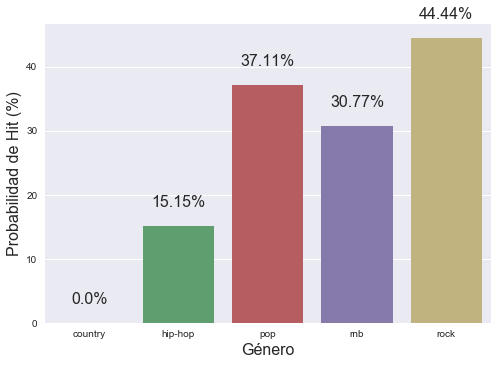

In [20]:
ax = sns.barplot(data=df_prob_genre.reset_index(),x='index',y='prob_hit')


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            str(round(p.get_height(),2)) + '%',
            ha="center", fontsize=16) 
    

plt.ylabel('Probabilidad de Hit (%)', fontsize=16)
plt.xlabel('Género', fontsize=16)

## Por Género
Es posible que exista una relación entre la popularidad de las canciones y su género, dado que algunos generos tienen mayor difusión que otros, como por ejemplo cuando se reproducen en boliches, se utilizan para publicidades, etc.
### Posición por semana por género
Obteniendo la media de posiciones por semana, para cada genero que tenga mas de 30 obras, podemos realizar el mismo análisis anterior, pero esta vez, por género en vez de por canción. <br>
Esto nos puede dar una perspectiva mas generalizada y nos ayuda a definir si el género influye o no en el éxito de la obra, teniendo siempre en cuenta que NO es una variable que defina esto.<br>

Analizando este gráfico, podemos ver que, en promedio, los únicos géneros musicales que llegan a superar las 20 semanas en el billboard son:
- Country
- Rock
- Rap
- Latin
- Pop


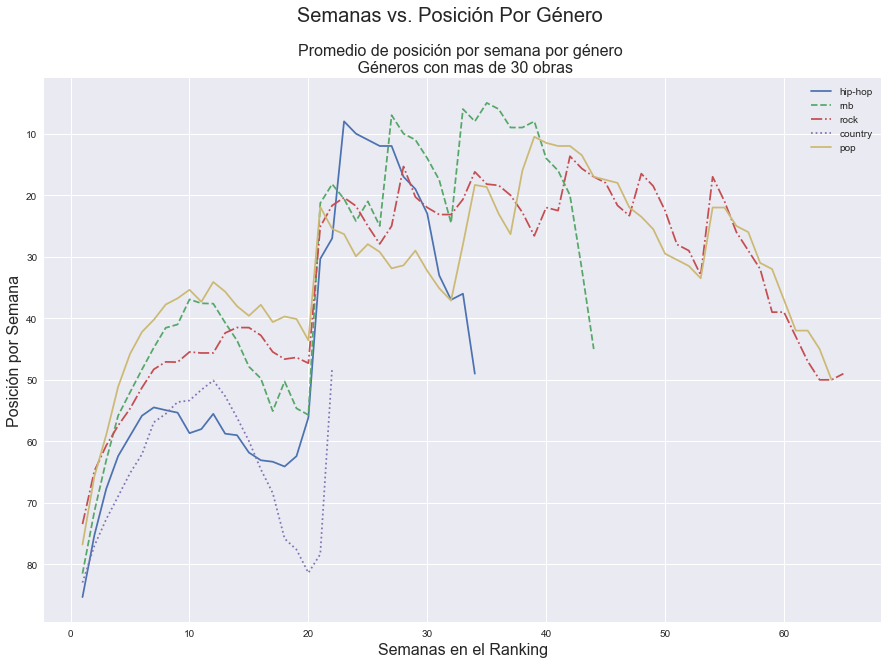

In [21]:
# Obtengo la media de CADA GENERO POR SEMANA agrupando por genero y semana
position_by_genre = df_billboard_melted.groupby(['genre.corrected','week']).mean()

# Convierto el index WEEK en una columna de datos.
position_by_genre = position_by_genre.reset_index('week')

# Obtengo una lista con todos los generos
genres = position_by_genre.index.unique()

# Establezco el tamaño del gráfico
plt.figure(figsize=(15,10))

# Creo un array con los tipos de lineas
linestyles = ['-', '--', '-.', ':']

# Creo una variable que me va a indicar qué estilo de linea usar.
curr_line_idx = 0


#Por cada genero del billboard
for genre in top_genres['genre.corrected']:
    # Obtener los datos de solo ese track
    df_genre = position_by_genre.loc[genre].sort_values('week')
    
    # Ploteamos las semanas contra la posición en cada semana
    plt.plot(df_genre['week'], df_genre['ranking'], label=genre, linestyle=linestyles[curr_line_idx])    
    plt.legend()
    
    # Si el indice actual de estilo de linea es el último, vuelvo a cero, sino lo incremento
    curr_line_idx = (curr_line_idx + 1) if curr_line_idx < (len(linestyles) -1) else 0
    
    
    
# EL numero mas grande de position indica menor altura en el ranking.
# Invertimos el eje Y para representarlo mejor.
plt.gca().invert_yaxis()

# Incluímos los labels de cada eje y el título
plt.suptitle('Semanas vs. Posición Por Género', fontsize=20)
plt.title('Promedio de posición por semana por género \n Géneros con mas de 30 obras', fontsize=16)
plt.xlabel('Semanas en el Ranking',fontsize=16)
plt.ylabel('Posición por Semana',fontsize=16)

## Ingresos al Billboard por mes (overall y por género)
Graficamos la cantidad de ingresos al Billboard por mes
Luego graficamos lo mismo pero por género

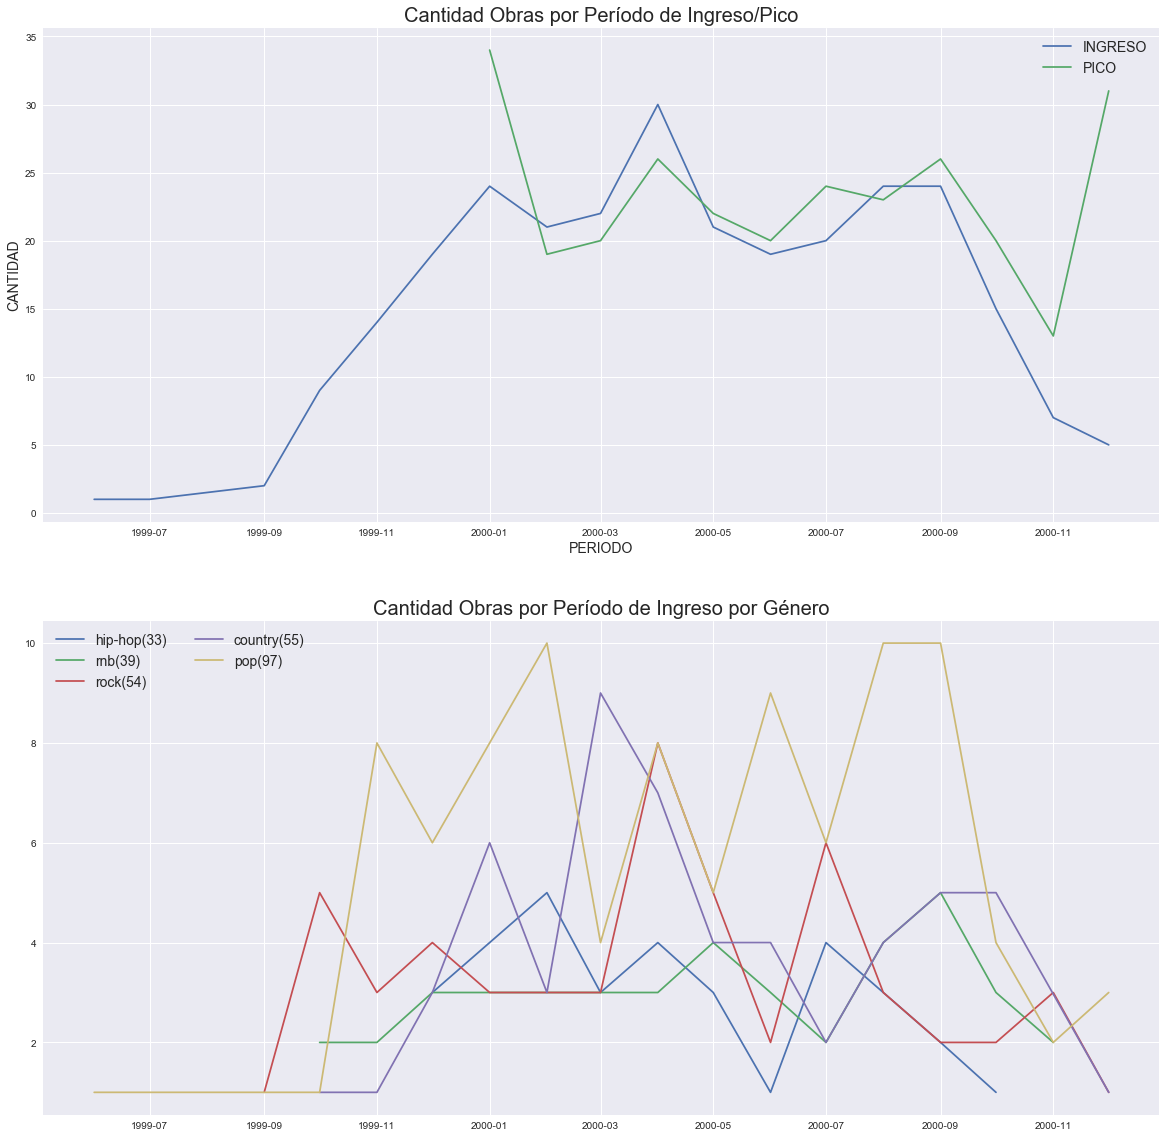

In [22]:
import matplotlib.dates as mdates

def preparar_dataframe(df, columna_agrupacion, columna_count):
    "Agrupa los datos de un DataFrame por fecha, y devuelve DataFrame preparado para plotear"
    # Agrupo por la columna requerida
    retval = df.loc[df['genre.corrected'].isin(top_genres['genre.corrected'])]
    retval = retval.groupby(df[columna_agrupacion]).agg({columna_count:'count'})
    retval = retval.reset_index()
    retval[columna_agrupacion + '_num'] = retval[columna_agrupacion].apply(lambda x: mdates.strpdate2num('%Y-%m')(str(x)))
    
    return retval

# Creo una instancia de agrupación por período de ingreso, y otra por período de pico
df_billboard_entered = preparar_dataframe(df_billboard, 'period.entered', 'track')
df_billboard_peaked = preparar_dataframe(df_billboard, 'period.peaked', 'track')

# Preparamos el plot de Ingreso/Pico de todas las obras
sns.set()
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)


plt.plot_date(fmt='-',x=df_billboard_entered['period.entered_num'], y=df_billboard_entered['track'], label='INGRESO')
plt.plot_date(fmt='-',x=df_billboard_peaked['period.peaked_num'], y=df_billboard_peaked['track'], label='PICO')


plt.title('Cantidad Obras por Período de Ingreso/Pico', fontsize=20)
plt.xlabel('PERIODO', fontsize=14)
plt.ylabel('CANTIDAD', fontsize=14)
plt.legend(fontsize=14)


# Creo una instancia de agrupación por período de ingreso, y otra por período de pico
df_billboard_genre_entered = df_billboard.groupby(['period.entered','genre.corrected']).agg({'track' : 'count'})
df_billboard_genre_peaked = df_billboard.groupby(['period.peaked','genre.corrected']).agg({'track' : 'count'})

# Convierto el indice periodo en columna
df_billboard_genre_entered = df_billboard_genre_entered.reset_index('period.entered')
df_billboard_genre_peaked = df_billboard_genre_peaked.reset_index('period.peaked')

# Convierto los períodos a nros
df_billboard_genre_entered['period.entered_num'] = df_billboard_genre_entered['period.entered'].apply(lambda x: mdates.strpdate2num('%Y-%m')(str(x)))
df_billboard_genre_peaked['period.peaked_num'] = df_billboard_genre_peaked['period.peaked'].apply(lambda x: mdates.strpdate2num('%Y-%m')(str(x)))

# 2do subplot
plt.subplot(2,1,2)
plt.title('Cantidad Obras por Período de Ingreso por Género', fontsize=20)
# Por cada genero
for genre in top_genres['genre.corrected']:
    
    # Obtengo los racks por periodo para el genero
    df_genre = df_billboard_genre_entered.loc[genre]
    total_tracks = df_genre['track'].sum()
    plt.plot_date(fmt='-',x=df_genre['period.entered_num'], y=df_genre['track'], label=genre + '(' + str(total_tracks) + ')')
# Convierto los index en columnas
#df_billboard_genre_entered = df_billboard_genre_entered.reset_index()
#df_billboard_genre_peaked = df_billboard_genre_peaked.reset_index()
plt.legend(fontsize=14, ncol=2)

plt.show()

## Distribución de Ranking por Género
Graficamos el ranking por género utilizando BoxPlots para poder observar la distribución de cada Género

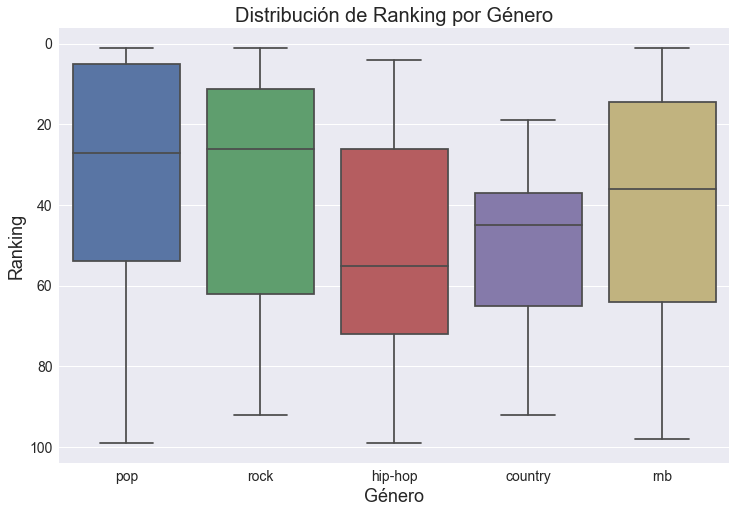

In [23]:
# Agrupo mi dataframe por artista y track
group_by_artist = df_billboard_melted.groupby(by=['artist','track','date.entered','date.peaked','genre.corrected'])

# Calculo el MAXIMO de semanas y el mínimo de ranking (ranking es de menor a mayor)
df_by_artist_track = group_by_artist.agg({'week':'max','ranking':'min'})

# Convierto el indice Genero a una columna
df_hits_by_artist = df_by_artist_track.reset_index('genre.corrected')

# Filtro solo los que están dentro de los TOP géneros
df_hits_by_artist = df_hits_by_artist.loc[df_hits_by_artist['genre.corrected'].isin(top_genres['genre.corrected'])]

sns.set()
plt.figure(figsize=(12,8))

#sns.violinplot(x='genre.corrected', y='ranking', data=df_hits_by_artist);
sns.boxplot(x='genre.corrected', y='ranking', data=df_hits_by_artist)

# El numero mas grande de position indica menor altura en el ranking.
# Invertimos el eje Y para representarlo mejor.
plt.gca().invert_yaxis()

# Preparo los labels y titulos
plt.xlabel('Género', fontsize=18)
plt.ylabel('Ranking', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribución de Ranking por Género', fontsize=20)
plt.show()

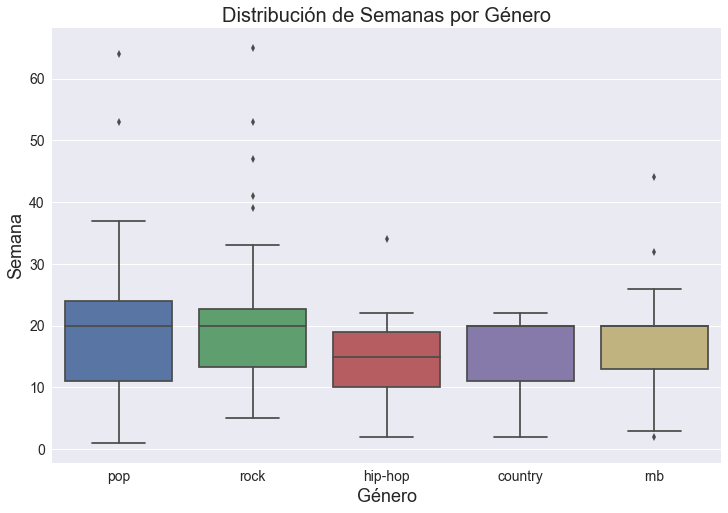

In [24]:
# Agrupo mi dataframe por artista y track
group_by_artist = df_billboard_melted.groupby(by=['artist','track','date.entered','date.peaked','genre.corrected'])

# Calculo el MAXIMO de semanas y el mínimo de ranking (ranking es de menor a mayor)
df_by_artist_track = group_by_artist.agg({'week':'max','ranking':'min'})

# Convierto el indice Genero a una columna
df_hits_by_artist = df_by_artist_track.reset_index('genre.corrected')

df_hits_by_artist = df_hits_by_artist.loc[df_hits_by_artist['genre.corrected'].isin(top_genres['genre.corrected'])]

sns.set()
plt.figure(figsize=(12,8))

sns.boxplot(x='genre.corrected', y='week', data=df_hits_by_artist)

plt.xlabel('Género', fontsize=18)
plt.ylabel('Semana', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribución de Semanas por Género', fontsize=20)
plt.show()

### Correlación entre Posición en el ranking y cantidad de semanas.
En los boxplots pudimos ver que los 3 generos parecen tener algún tipo de correlación entre Ranking y Cantidad de semanas.


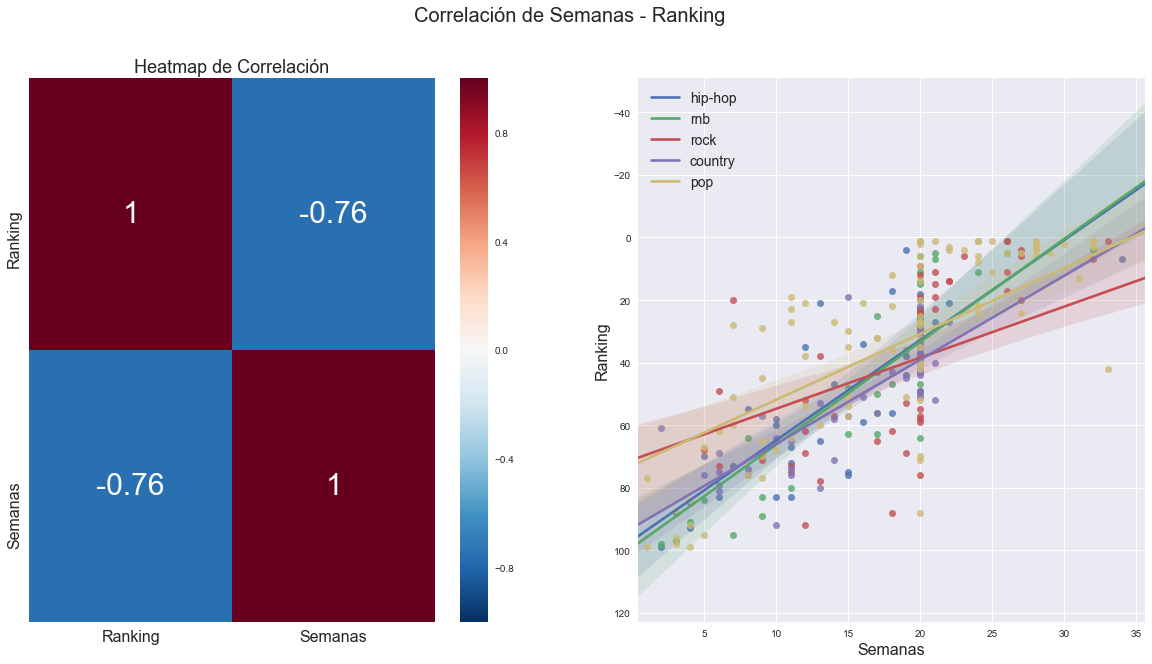

In [25]:
corrcoref_ranking_week = np.corrcoef(df_by_artist_track['ranking'], df_by_artist_track['week'])
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.heatmap(corrcoref_ranking_week, annot=True,annot_kws={"fontsize": 30}, xticklabels=['Ranking','Semanas'], yticklabels=['Ranking','Semanas']);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Heatmap de Correlación', fontsize=18)

plt.subplot(1,2,2)

# Convierto el indice de genero a una columna y guardo el dataset generado en una nueva variable

df_plots = df_by_artist_track.reset_index('genre.corrected')

for genre in top_genres['genre.corrected']:
    
    # Obtengo un dataframe solo del género de la iteración actual
    df_plot = df_plots.loc[df_plots['genre.corrected'] == genre]
    sns.regplot(x=df_plot['week'], y=df_plot['ranking'])

plt.xlabel('Semanas', fontsize=16)
plt.ylabel('Ranking', fontsize=16)
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend(top_genres['genre.corrected'], fontsize=14)
plt.suptitle('Correlación de Semanas - Ranking', fontsize=20)

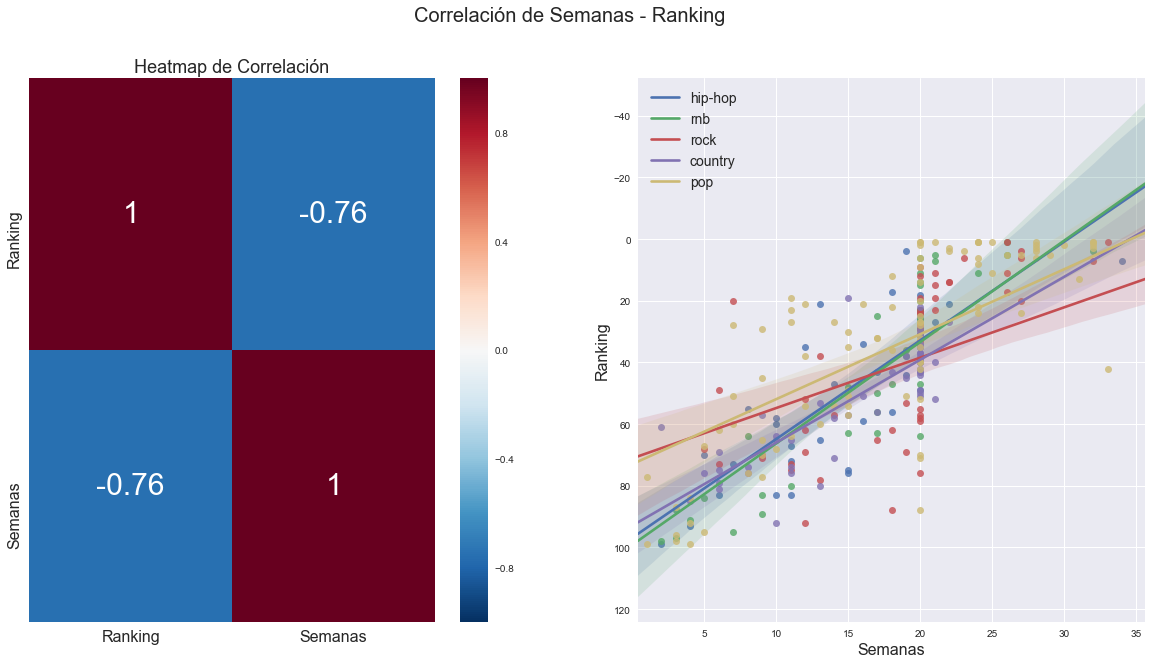

In [26]:
corrcoref_ranking_week = np.corrcoef(df_by_artist_track['ranking'], df_by_artist_track['week'])
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.heatmap(corrcoref_ranking_week, annot=True,annot_kws={"fontsize": 30}, xticklabels=['Ranking','Semanas'], yticklabels=['Ranking','Semanas']);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Heatmap de Correlación', fontsize=18)

plt.subplot(1,2,2)

# Convierto el indice de genero a una columna y guardo el dataset generado en una nueva variable

df_plots = df_by_artist_track.reset_index('genre.corrected')

for genre in top_genres['genre.corrected']:
    
    # Obtengo un dataframe solo del género de la iteración actual
    df_plot = df_plots.loc[df_plots['genre.corrected'] == genre]
    sns.regplot(x=df_plot['week'], y=df_plot['ranking'])

plt.xlabel('Semanas', fontsize=16)
plt.ylabel('Ranking', fontsize=16)
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend(top_genres['genre.corrected'], fontsize=14)
plt.suptitle('Correlación de Semanas - Ranking', fontsize=20)

### Relacion entre variables
Realizamos un plot que nos permita visualizar la relacin entre las distintas variables calculadas

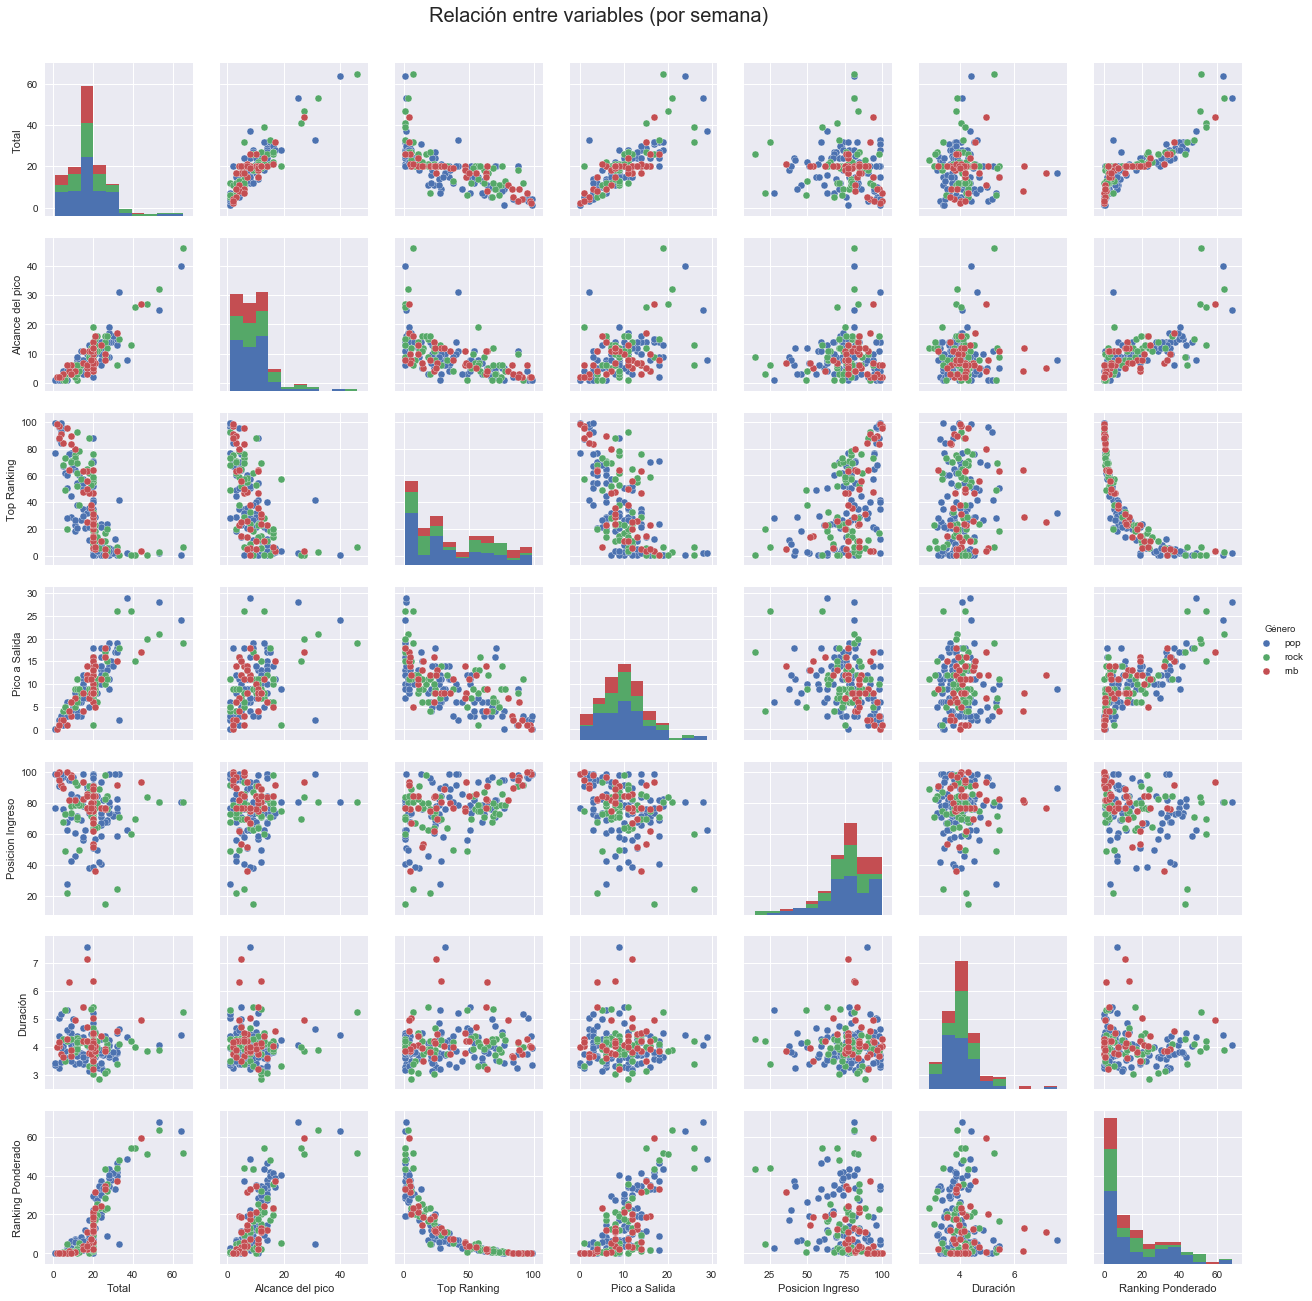

In [27]:


df_variables_week = df_billboard_group.loc[df_billboard_group['genre.corrected'].isin(top_genres['genre.corrected']),['week', 'top_ranking_week','ranking','weeks_peak_to_removal', 'genre.corrected','enter_ranking','float_minutes','ranking_ponderado']]
df_variables_week = df_variables_week.rename(columns = {
    'week': 'Total',
    'top_ranking_week': 'Alcance del pico',
    'ranking': 'Top Ranking',
    'weeks_peak_to_removal': 'Pico a Salida',
    'genre.corrected':'Género',
    'enter_ranking': 'Posicion Ingreso',
    'float_minutes': 'Duración',
    'ranking_ponderado': 'Ranking Ponderado'
})

df_plot_genres = top_genres.loc[top_genres['genre.corrected'].isin(['rock','rnb','pop'])]





# Realizamos un paneo global de todas las variables, pero solo teniengo en cuenta los generos TOP
p = sns.pairplot(df_variables_week.loc[df_billboard_group['genre.corrected'].isin(df_plot_genres['genre.corrected'])], hue='Género')
p.fig.text(0.33, 1.02,'Relación entre variables (por semana)', fontsize=20)
#df_variables_week.loc[df_min_ranking_week['genre.corrected'].isin(top_genres['genre.corrected'])]

### Grafíco la correlación entre variables por semana y por día

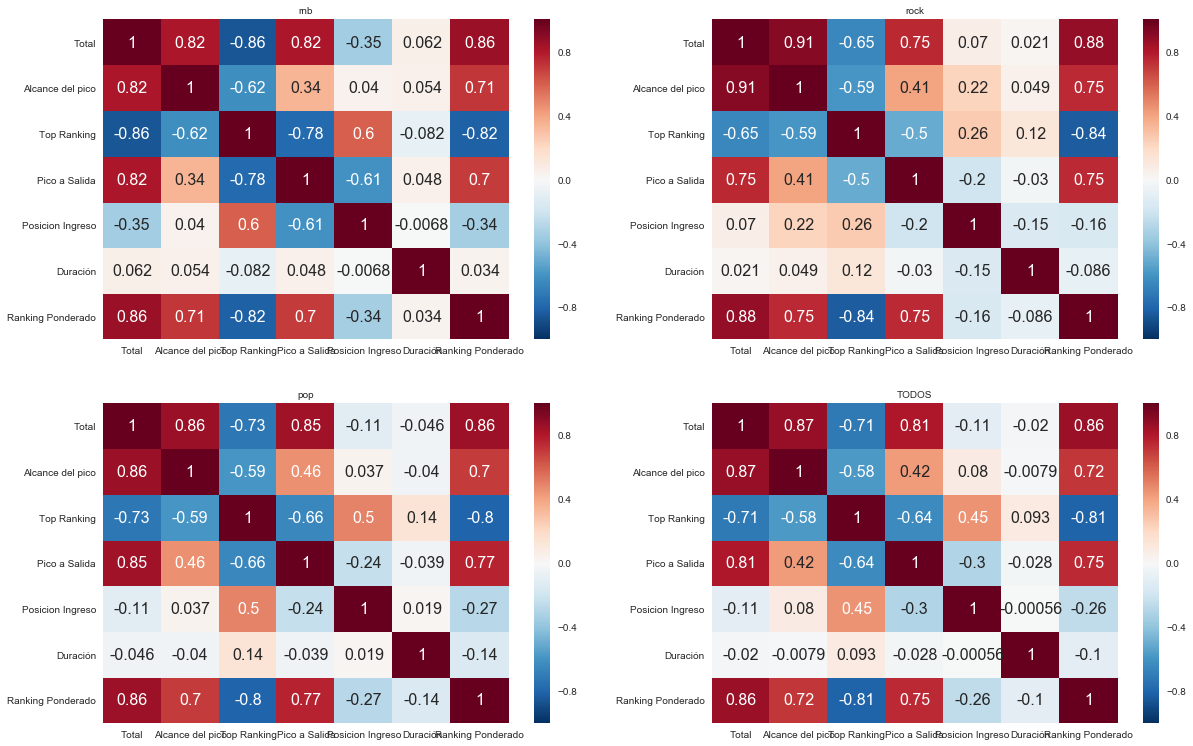

In [28]:
plt_filas = 3
plt_columnas = 2
plt_actual = 1

plt.figure(figsize=(20,20))

# Graficamos la correlacion de cada genero
for genre in df_plot_genres['genre.corrected']:    
    plt.subplot(plt_filas, plt_columnas, plt_actual)
    sns.heatmap(df_variables_week.loc[df_variables_week['Género'] == genre].corr(), annot=True,annot_kws={"fontsize": 16})
    plt.yticks(rotation=0)
    plt.title(genre, fontsize=10)
    
    plt_actual += 1
    
# Graficamos la correlacion de TODOS los géneros.
plt.subplot(plt_filas, plt_columnas, plt_actual)
sns.heatmap(df_variables_week.loc[df_variables_week['Género'].isin(df_plot_genres['genre.corrected'])].corr(), annot=True,annot_kws={"fontsize": 16})
plt.yticks(rotation=0)
plt.title('TODOS', fontsize=10)

### Ranking Max - Permanencia - Ponderado

In [29]:
top_genres['genre.corrected']

7     hip-hop
8         rnb
9        rock
10    country
11        pop
Name: genre.corrected, dtype: object

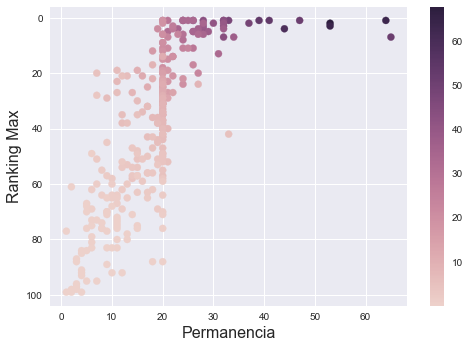

In [30]:
df_plot = df_billboard_group.loc[df_billboard_group['genre.corrected'].isin(top_genres['genre.corrected'])].sort_values(by='ranking_ponderado', ascending=False)

df_plot.sort_values(by='ranking_ponderado', ascending=False)
#sns.regplot(x=df_plot['days.peaked'], y=df_plot['ranking_ponderado'])


x, y, z = np.random.rand(3, 100)
cmap = sns.cubehelix_palette(as_cmap=True)

f, ax = plt.subplots()
points = ax.scatter(df_plot['week'], df_plot['ranking'], c=df_plot['ranking_ponderado'], s=50, cmap=cmap)

f.colorbar(points)
plt.gca().invert_yaxis()

plt.ylabel('Ranking Max',fontsize=16)
plt.xlabel('Permanencia',fontsize=16)

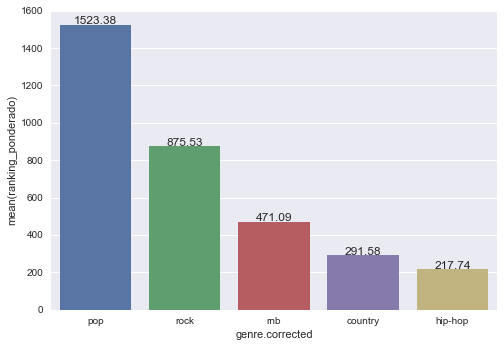

In [31]:
# Obtengo los hits agrupados por genero, y sumo el ponderado.
# Luego ordeno por esa suma
df_plot1 = df_plot.groupby(by='genre.corrected').agg({'ranking_ponderado':'sum'}).sort_values('ranking_ponderado',ascending=False).reset_index()

# Creo un barplot
ax = sns.barplot(data=df_plot1, x='genre.corrected',y='ranking_ponderado')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            str(round(p.get_height(),2)),
            ha="center", fontsize=12) 
    
# Recorro cada indice de los generos
#for index, row in df_plot1.iterrows():
    # Establezco el texto a mostrar en cada barra
    #g.text(x=row['genre.corrected'].index(), y=row['ranking_ponderado'], s=round(row['ranking_ponderado'],2), color='black', ha="center")

#plt.ylabel('Ranking Ponderado',fontsize=16)
#plt.xlabel('Género',fontsize=16)


### Validamos los Datos

(array([ 0.5,  1.5,  2.5,  3.5]), <a list of 4 Text yticklabel objects>)

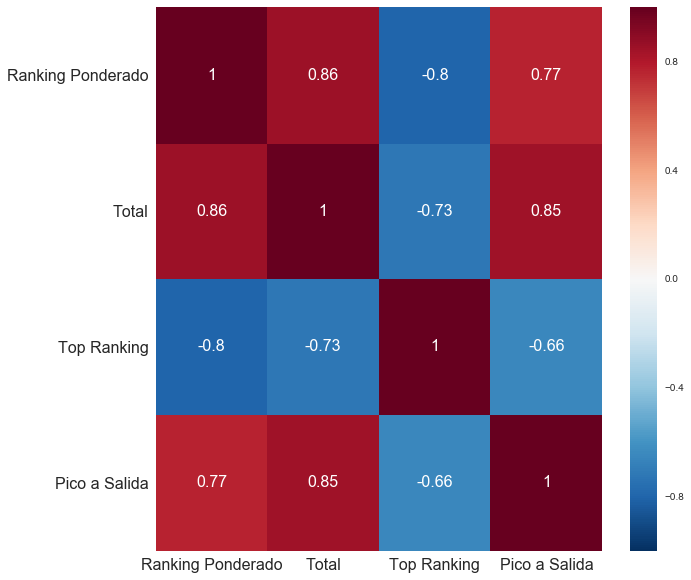

In [32]:
plt.figure(figsize=(10,10))

# Obtengo las variables a validar
df_plot = df_variables_week.loc[df_variables_week['Género'] == genre,['Ranking Ponderado','Total','Top Ranking','Pico a Salida']]
# Grafico la correlación
sns.heatmap(df_plot.corr(), annot=True,annot_kws={"fontsize": 16})
plt.xticks(fontsize=16)
plt.yticks(rotation=0, fontsize=16)
